In [5]:
import numpy as np
import gzip

In [6]:
import pandas as pd
from scipy import sparse

In [7]:
f = gzip.GzipFile('data/rec_mat.gz', "r")

In [8]:
data=np.load(f)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def get_distribution(mat):
    return (np.unique(mat,return_counts=True))
def get_distribution_perc(count):
    print("Percentage of Zeroes",count[1][0]/sum(count[1]))
    print("Percentage of Ones",count[1][1]/sum(count[1]))
    print("Percentage of Twos",count[1][2]/sum(count[1]))
    print("Percentage of Threes",count[1][3]/sum(count[1]))
    print("Percentage of Fours",count[1][4]/sum(count[1]))
    print("Percentage of Fives",count[1][5]/sum(count[1]))
def find_active_user(mat):
    max_u=0
    for i in range(0,np.shape(mat)[0]):
        if max_u<np.sum(mat[i,:]!=0):
            max_u=np.sum(mat[i,:]!=0)
            user_id=i
    return max_u,user_id
def find_average_known_per_user(mat):
    counts=[]
    for i in range(0,np.shape(mat)[0]):
        counts.append(np.sum(mat[i,:]!=0))
    return np.mean(counts)
def find_active_movie(mat):
    max_m=0
    for i in range(0,np.shape(mat)[1]):
        if max_m<np.sum(mat[:,i]!=0):
            max_m=np.sum(mat[:,i]!=0)
            max_movie=i
    return max_m,max_movie
def find_average_known_per_movie(mat):
    counts=[]
    for i in range(0,np.shape(mat)[1]):
        counts.append(np.sum(mat[:,i]!=0))
    return np.mean(counts)
def outlier_user(mat):
    u_ids=[]
    known_rats=[]
    for i in range(0,np.shape(mat)[0]):
        if np.sum(mat[i,:]!=0)<=10:
            known_rats.append(np.sum(mat[i,:]!=0))
            u_ids.append(i)
    return u_ids,known_rats
def outlier_items(mat):
    m_ids=[]
    known_rats=[]
    for i in range(0,np.shape(mat)[1]):
        if np.sum(mat[:,i]!=0)<=10:
            known_rats.append(np.sum(mat[:,i]!=0))
            m_ids.append(i)
    return m_ids,known_rats
def known_ratings_per_user(mat):
    u_ids=[]
    known_rats=[]
    for i in range(0,np.shape(mat)[0]):
            known_rats.append(np.sum(mat[i,:]!=0))
            u_ids.append(i)
    return u_ids,known_rats
def known_ratings_per_movie(mat):
    m_ids=[]
    known_rats=[]
    for i in range(0,np.shape(mat)[1]):
            known_rats.append(np.sum(mat[:,i]!=0))
            m_ids.append(i)
    return m_ids,known_rats


[0. 1. 2. 3. 4. 5.]
[  1.1350189  227.45365632  99.83228177  36.14557994  30.55991883
  22.64718405]


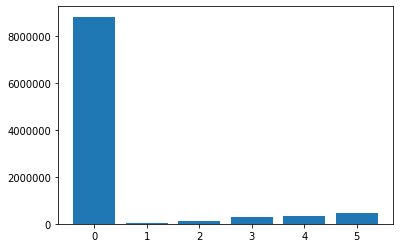

In [10]:
counts=get_distribution(data)
print(counts[0])
print(1/(counts[1]/sum(counts[1])))
plt.bar(counts[0],counts[1])
plt.show()


In [11]:
get_distribution_perc(counts)

Percentage of Zeroes 0.8810426
Percentage of Ones 0.0043965
Percentage of Twos 0.0100168
Percentage of Threes 0.0276659
Percentage of Fours 0.0327226
Percentage of Fives 0.0441556


In [12]:
print("Active_user",find_active_user(data)[1])
print("Number of ratings of the most active user",find_active_user(data)[0])
print("Mean_of_number_known_ratings_per_user",find_average_known_per_user(data))
print("Active_movie",find_active_movie(data)[1])
print("Number of ratings of the most active movie",find_active_movie(data)[0])
print("Mean_of_number_known_ratings_per_movie",find_average_known_per_movie(data))
#Conclusion we know more about movies than about the users due to the fact that the number of users are ten times the number of movies

Active_user 5511
Number of ratings of the most active user 522
Mean_of_number_known_ratings_per_user 118.9574
Active_movie 5
Number of ratings of the most active movie 5035
Mean_of_number_known_ratings_per_movie 1189.574


[1.93346526e-05 1.25254923e-04 7.48166991e-05 ... 3.53067569e-05
 7.31354250e-05 9.75138999e-05]
0.6007


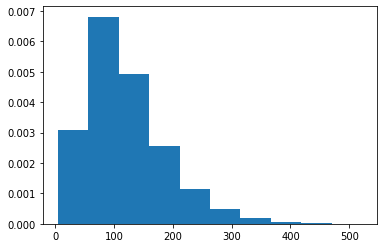

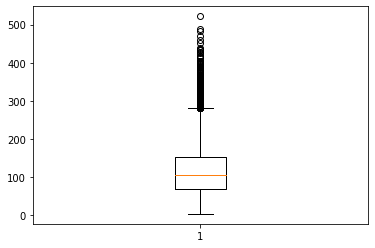

User_outliers [ 480 5787 3677 3270 1868 2532 2841 4494 2749 3463] [ 4  5  7  8  9  9  9  9 10 11]


In [13]:
idu,ru=known_ratings_per_user(data)
contri=ru/sum(ru)
print(ru/sum(ru))
contri_sorted=contri[contri.argsort()][::-1]
count=0
prob=0
for i in range(0,len(contri_sorted)):
    if (prob<=0.8):
           prob=prob+contri_sorted[i]
           count=count+1 
print(count/10000)
plt.hist(ru,density="TRUE")
plt.show()
idu=np.array(idu)
ru=np.array(ru)
plt.boxplot(ru)
plt.show()
k=ru.argsort()
ru=ru[k]
idu=idu[k]
print("User_outliers",idu[0:10],ru[0:10])

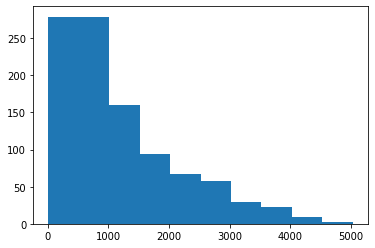

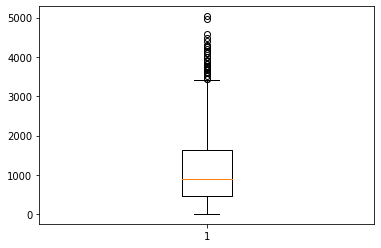

Movie_outliers [954 927 783 467 945 708 757 242 956  40] [ 8 19 27 27 33 38 41 45 46 48]


In [14]:
idm,rm=known_ratings_per_movie(data)
contri=rm/sum(rm)
#print(rm/sum(rm))
contri_sorted=contri[contri.argsort()][::-1]
count=0
prob=0
for i in range(0,len(contri_sorted)):
    if (prob<=0.8):
        prob=prob+contri_sorted[i]
        count=count+1 
#print(count/1000)
#print(rm)
plt.hist(rm)
plt.show()
idm=np.array(idm)
rm=np.array(rm)
plt.boxplot(rm)
plt.show()
k=rm.argsort()
rm=rm[k]
idm=idm[k]
print("Movie_outliers",idm[0:10],rm[0:10])

In [15]:
#SVD baseline exploration

In [16]:
print("Number of zero entries:",np.sum(data!=0))
#Sparsity coefficient
print("Matrix Density:",np.sum(data!=0)/(data.shape[0]*data.shape[1]))

Number of zero entries: 1189574
Matrix Density: 0.1189574


In [17]:
#overall mean imputation
mean_overall=np.sum(data)/np.sum(data!=0)
print("mean per user")
print(mean_overall,mean_overall.shape)
temp=data.copy()
temp[temp==0]=mean_overall
data_mean_overall=temp
print("User imputed matrix")
print(data_mean_overall)

mean per user
3.859332836797038 ()
User imputed matrix
[[3.85933284 3.85933284 3.85933284 ... 3.85933284 3.85933284 3.85933284]
 [3.85933284 3.85933284 3.85933284 ... 5.         3.         3.        ]
 [3.85933284 3.85933284 3.85933284 ... 3.85933284 3.85933284 3.85933284]
 ...
 [3.85933284 3.85933284 3.85933284 ... 3.85933284 3.85933284 3.85933284]
 [3.85933284 3.85933284 3.85933284 ... 3.85933284 3.85933284 3.85933284]
 [3.85933284 3.85933284 3.85933284 ... 3.85933284 3.85933284 3.        ]]


In [18]:
mean_per_user=np.sum(data,axis=1)/np.sum(data!=0,axis=1)
#print("mean per user")
#print(mean_per_user,mean_per_user.shape)
temp=data.copy()
for i in range(10000):
    temp[i,temp[i,:]==0]=mean_per_user[i]
data_user_imputed=temp
#print("User imputed matrix")
#print(data_user_imputed)

In [19]:
#per movie imputation
mean_per_movie=np.sum(data,axis=0)/np.sum(data!=0,axis=0)
#print("mean per item")
#print(mean_per_movie[0])
#print(mean_per_movie,mean_per_movie.shape)
temp=data.copy()
for i in range(1000):
    temp[temp[:,i]==0,i]=mean_per_movie[i]
data_movie_imputed=temp
#print("User imputed matrix")
#print(data_movie_imputed)

(10000, 10000) (1000,) (1000, 1000)
[[12206.71632793     0.             0.         ...     0.
      0.             0.        ]
 [    0.           160.83646791     0.         ...     0.
      0.             0.        ]
 [    0.             0.            99.83043271 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]]


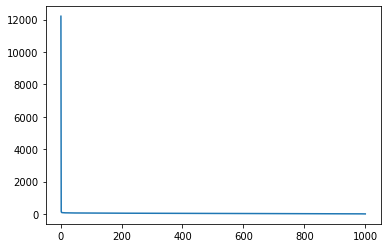

predictions: [[3.8716749  3.85855046 3.84784626 ... 3.86415065 3.85939178 3.83920385]
 [3.83275236 3.81541223 3.80273198 ... 3.82039189 3.81552565 3.82063206]
 [3.84727261 3.83580849 3.82592784 ... 3.84157812 3.83690557 3.80774011]
 ...
 [3.85507884 3.84174947 3.83096597 ... 3.84729175 3.84254396 3.82394995]
 [3.8538455  3.8383674  3.8265555  ... 3.8436285  3.83880536 3.83264284]
 [3.87377969 3.85883226 3.84725196 ... 3.86419983 3.85937354 3.84965446]]


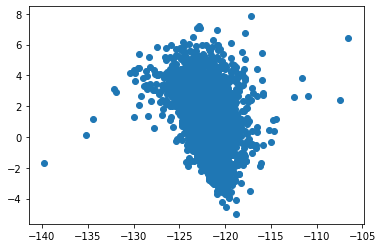

movie_embeddings


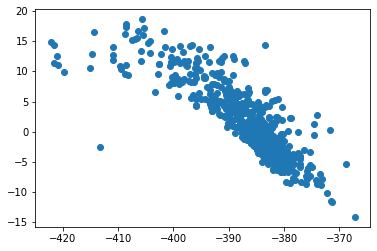

In [20]:
# using the builtin svd function in numpy
# Overall mean imputation keep zeros as they are
U,d,Vt=np.linalg.svd(data_mean_overall) #shapes U=10000*10000 , d=1000, V=1000*1000
print(U.shape,d.shape,Vt.shape)
# creating a proper diagonal matrix
D=np.zeros([10000,1000])
D[range(0,1000),range(0,1000)]=d
print(D)
#Deciding on k
plt.plot(range(1,1001),d)
plt.show()
#Note huge drop after first eigen value keep k=2
U_k=U[:,0:2]
D_k=D[0:2,0:2]
Vt_k=Vt[0:2,:]
preds_k2=np.matmul(np.matmul(U_k,D_k),Vt_k)# predictions dont make much sense :(
print("predictions:",preds_k2)
#plotting user embeddings
U_D=np.matmul(U_k,D_k)
plt.scatter(U_D[:,0],U_D[:,1])
plt.show()
#plot movie embeddings
print("movie_embeddings")
V_D=np.matmul(Vt_k.T,D_k)
plt.scatter(V_D[:,0],V_D[:,1])
plt.show()

(10000, 10000) (1000,) (1000, 1000)
[[12161.5204474      0.             0.         ...     0.
      0.             0.        ]
 [    0.           150.44920763     0.         ...     0.
      0.             0.        ]
 [    0.             0.            98.53225569 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]]


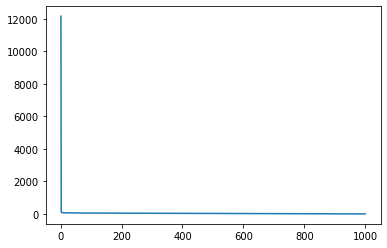

Preds [[3.8716749  3.85855046 3.84784626 ... 3.86415065 3.85939178 3.83920385]
 [3.83275236 3.81541223 3.80273198 ... 3.82039189 3.81552565 3.82063206]
 [3.84727261 3.83580849 3.82592784 ... 3.84157812 3.83690557 3.80774011]
 ...
 [3.85507884 3.84174947 3.83096597 ... 3.84729175 3.84254396 3.82394995]
 [3.8538455  3.8383674  3.8265555  ... 3.8436285  3.83880536 3.83264284]
 [3.87377969 3.85883226 3.84725196 ... 3.86419983 3.85937354 3.84965446]]
user embeddings


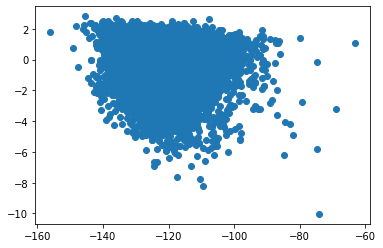

movie_embeddings


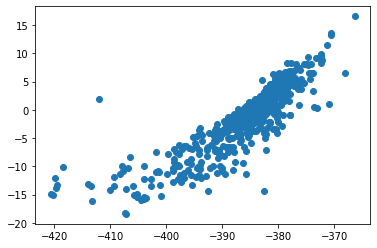

In [21]:
# using the builtin svd function in numpy
# User imputed
U,d,Vt=np.linalg.svd(data_user_imputed) #shapes U=10000*10000 , d=1000, V=1000*1000
print(U.shape,d.shape,Vt.shape)
# creating a proper diagonal matrix
D=np.zeros([10000,1000])
D[range(0,1000),range(0,1000)]=d
print(D)
#Deciding on k
plt.plot(range(1,1001),d)
plt.show()
#Note huge drop after first eigen value keep k=2
U_k=U[:,0:2]
D_k=D[0:2,0:2]
Vt_k=Vt[0:2,:]
user_imp_preds=np.matmul(np.matmul(U_k,D_k),Vt_k)# 
print("Preds",preds_k2)
#plotting user embeddings
print("user embeddings")
U_D=np.matmul(U_k,D_k)
plt.scatter(U_D[:,0],U_D[:,1])
plt.show()
print("movie_embeddings")
V_D=np.matmul(Vt_k.T,D_k)
plt.scatter(V_D[:,0],V_D[:,1])
plt.show()

(10000, 10000) (1000,) (1000, 1000)
[[11491.91780806     0.             0.         ...     0.
      0.             0.        ]
 [    0.           111.51305308     0.         ...     0.
      0.             0.        ]
 [    0.             0.            90.2099574  ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]]


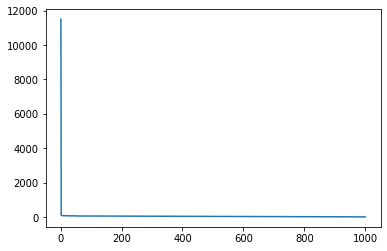

Preds [[3.8716749  3.85855046 3.84784626 ... 3.86415065 3.85939178 3.83920385]
 [3.83275236 3.81541223 3.80273198 ... 3.82039189 3.81552565 3.82063206]
 [3.84727261 3.83580849 3.82592784 ... 3.84157812 3.83690557 3.80774011]
 ...
 [3.85507884 3.84174947 3.83096597 ... 3.84729175 3.84254396 3.82394995]
 [3.8538455  3.8383674  3.8265555  ... 3.8436285  3.83880536 3.83264284]
 [3.87377969 3.85883226 3.84725196 ... 3.86419983 3.85937354 3.84965446]]
user_embeddings


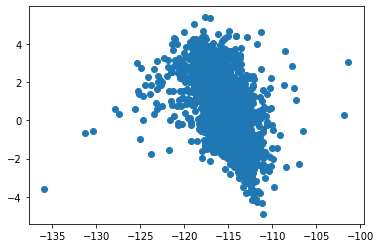

movie_embeddings


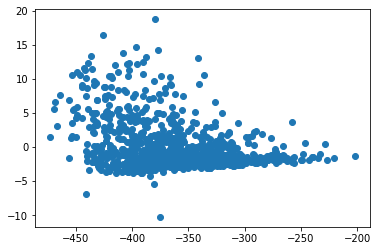

In [22]:
# using the builtin svd function in numpy
# Movie imputed
U,d,Vt=np.linalg.svd(data_movie_imputed) #shapes U=10000*10000 , d=1000, V=1000*1000
print(U.shape,d.shape,Vt.shape)
# creating a proper diagonal matrix
D=np.zeros([10000,1000])
D[range(0,1000),range(0,1000)]=d
print(D)
#Deciding on k
plt.plot(range(1,1001),d)
plt.show()
#Note huge drop after first eigen value keep k=2
U_k=U[:,0:2]
D_k=D[0:2,0:2]
Vt_k=Vt[0:2,:]
movie_imputed_preds=np.matmul(np.matmul(U_k,D_k),Vt_k)
print("Preds",preds_k2)
#plotting user embeddings
print("user_embeddings")
U_D=np.matmul(U_k,D_k)
plt.scatter(U_D[:,0],U_D[:,1])
plt.show()
#plot movie embeddings
print("movie_embeddings")
V_D=np.matmul(Vt_k.T,D_k)
plt.scatter(V_D[:,0],V_D[:,1])
plt.show()